In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from math import sqrt

In [73]:
# Instancia o dataframe

df_airbnb = pd.read_csv('airbnb.csv', index_col='id', engine='python', sep =',', encoding="utf-8")
df_airbnb

,latitude,longitude,neighbourhood,room_type,bedrooms,cleaning_fee,security_deposit,Free_parking_on_premises,extra_people,Pool,...,Crib,Washer,Dishwasher,Suitable_for_events,property_type,Full_kitchen,Internet,Bathtub,Cable_TV,price
id,,,,,,,,,,,,,,,,,,,,,
17878,-22.96592,-43.17896,0,0,2.0,378.0,0.0,0,63.0,0,...,0,0,0,1,0,0,1,0,1,332.0
25026,-22.97712,-43.19045,0,0,1.0,250.0,1000.0,0,45.0,0,...,0,0,0,0,1,0,1,0,1,160.0
31560,-22.98302,-43.21427,1,0,1.0,84.0,0.0,0,42.0,0,...,0,0,0,0,1,0,1,0,1,273.0
35636,-22.98816,-43.19359,1,0,1.0,172.0,1050.0,0,63.0,0,...,0,1,0,0,1,0,1,0,1,378.0
35764,-22.98127,-43.19046,0,0,1.0,140.0,400.0,0,80.0,0,...,0,0,0,0,2,0,0,0,1,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39672365,-23.01400,-43.30404,7,0,1.0,51.0,0.0,1,22.0,1,...,0,1,0,0,1,0,0,0,0,348.0
39687724,-22.98724,-43.19300,1,0,1.0,175.0,0.0,0,0.0,0,...,0,0,0,0,1,0,0,0,0,139.0
39693710,-22.96377,-43.17573,0,0,1.0,160.0,0.0,0,80.0,0,...,0,0,0,0,1,0,1,0,0,189.0


In [74]:
# Calcula métricas de desempenho do regressor.

def get_metrics(y_test, y_pred):  

    rmse = round(sqrt(mean_squared_error(y_test, y_pred)),4)
    r2 = round(r2_score(y_test, y_pred),4)

    return rmse, r2

In [75]:
# Define semente aleatória

random_state=1223614

In [76]:
# Vamos dividir da seguinte forma: 90% para treino e 10% para teste. 
# Os registros deverão ser embaralhados.

X = df_airbnb.drop(columns=['price'])
y = df_airbnb['price']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=random_state)

print("Quantidade de registros de X_train: " + str(X_train.shape[0]))
print("Quantidade de registros de y_train: " + str(y_train.shape[0]))
print("Quantidade de registros de X_test: " + str(X_test.shape[0]))
print("Quantidade de registros de y_test: " + str(y_test.shape[0]))

Quantidade de registros de X_train: 8100
Quantidade de registros de y_train: 8100
Quantidade de registros de X_test: 900
Quantidade de registros de y_test: 900


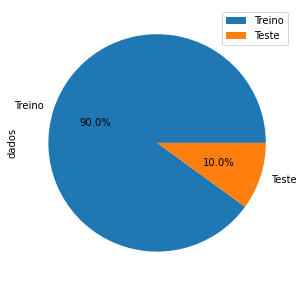

In [77]:
df = pd.DataFrame({'dados': [X_train.shape[0] , X_test.shape[0]]}, index=['Treino', 'Teste'])
df.plot.pie(y='dados', figsize=(5, 5), autopct='%1.1f%%')

In [78]:
# criando lista de modelos preditivos a serem comparados - Primeira Rodada
# mapeando os nomes dos parâmetros dos modelos aos valores a serem verificados

models = []

from sklearn.linear_model import LinearRegression
param_grid_0 = {}
param_grid_1 = {'fit_intercept':[True,False],'normalize':[True,False]}
models.append(('LinearRegression', LinearRegression(), param_grid_0, param_grid_1))

from sklearn.linear_model import Ridge
param_grid_0 = {}
param_grid_1 = {'alpha':[0.01, 10, 1000],'normalize':[True,False],'copy_X':[True,False]
                , 'fit_intercept':[True,False], 'max_iter':[None], 'normalize':[True,False]
                , 'random_state':[None,0], 'solver':['auto'], 'tol':[0.001]}
models.append(('Ridge', Ridge(), param_grid_0, param_grid_1))

from sklearn.svm import SVR
param_grid_0 = {}
param_grid_1 = {'kernel':['linear', 'rbf'], 'gamma': [0.001, 0.1, 1, 10],'C': [0.001, 0.1, 1, 10]
                , 'epsilon': [x/100 for x in range(100,201,10)]}
models.append(('SVR', SVR(), param_grid_0, param_grid_1))

from sklearn.ensemble import RandomForestRegressor
param_grid_0 = {}
param_grid_1 = {'max_depth':range(1,4), 'random_state':[None, 0]
                , 'n_estimators':range(50,151,50),'bootstrap' :[True,False]}
models.append(('RandomForestRegressor', RandomForestRegressor(), param_grid_0, param_grid_1))

from sklearn.ensemble import GradientBoostingRegressor
param_grid_0 = {}
param_grid_1 = {'n_estimators':range(60,201,40), 'max_depth':range(1,5,2)
                , 'learning_rate':[x/100 for x in range(10,101,20)]}
models.append(('GradientBoostingRegressor', GradientBoostingRegressor(), param_grid_0, param_grid_1))

from sklearn.neighbors import KNeighborsRegressor
param_grid_0 = {}
param_grid_1 = {'n_neighbors':[3, 5, 7],'weights':['uniform','distance'],'p':[1,2]  }
models.append(('KNeighborsRegressor', KNeighborsRegressor(), param_grid_0, param_grid_1))

from sklearn.tree import DecisionTreeRegressor
param_grid_0 = {}
param_grid_1 = {'max_depth':[None, 1, 2, 3, 4, 5, 6],'splitter':['best','random']
                ,'presort':[True,False]}
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(), param_grid_0, param_grid_1))

from sklearn.linear_model import Lasso
param_grid_0 = {}
param_grid_1 = {'fit_intercept':[True,False],'normalize':[True,False]
                ,'copy_X':[True,False],'selection':['cyclic','random'],'alpha':np.logspace(-3,3,5)}
models.append(('Lasso', Lasso(), param_grid_0, param_grid_1))

from sklearn.linear_model import ElasticNet
param_grid_0 = {}
param_grid_1 = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]
                ,'selection':['cyclic','random'],'alpha':np.logspace(-3,3,5),'l1_ratio':np.logspace(-3,3,5)}
models.append(('ElasticNet', ElasticNet(), param_grid_0, param_grid_1))

from sklearn.ensemble import AdaBoostRegressor
param_grid_0 = {}
param_grid_1 = {'n_estimators':[20,50,80,100],'loss':['linear', 'square', 'exponential']
                ,'random_state':[None,0,42]}
models.append(('AdaBoostRegressor', AdaBoostRegressor(), param_grid_0, param_grid_1))

from sklearn.linear_model import SGDRegressor
param_grid_0 = {}
param_grid_1 = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive']
                ,'penalty':['none','l2', 'l1','elasticnet'],'alpha':np.logspace(-3,3,5),'l1_ratio':[0.05,0.5,0.95]}
models.append(('SGDRegressor', SGDRegressor(), param_grid_0, param_grid_1))

from sklearn.linear_model import LassoLars
param_grid_0 = {}
param_grid_1 = {'alpha':[0.01, 0.5, 1.0, 1.5, 2.0], 'max_iter':[100, 300, 500]}
models.append(('LassoLars', LassoLars(), param_grid_0, param_grid_1))                           
models_df = pd.DataFrame(models, columns=['name', 'model', 'par_grid_0', 'par_grid_1'])
models_df.set_index('name', inplace = True)
models_df

,model,par_grid_0,par_grid_1
name,,,
LinearRegression,LinearRegression(),{},"{'fit_intercept': [True, False], 'normalize': ..."
Ridge,Ridge(),{},"{'alpha': [0.01, 10, 1000], 'normalize': [True..."
SVR,SVR(),{},"{'kernel': ['linear', 'rbf'], 'gamma': [0.001,..."
RandomForestRegressor,RandomForestRegressor(),{},"{'max_depth': (1, 2, 3), 'random_state': [None..."
GradientBoostingRegressor,GradientBoostingRegressor(),{},"{'n_estimators': (60, 100, 140, 180), 'max_dep..."
KNeighborsRegressor,KNeighborsRegressor(),{},"{'n_neighbors': [3, 5, 7], 'weights': ['unifor..."
DecisionTreeRegressor,DecisionTreeRegressor(),{},"{'max_depth': [None, 1, 2, 3, 4, 5, 6], 'split..."
Lasso,Lasso(),{},"{'fit_intercept': [True, False], 'normalize': ..."
ElasticNet,ElasticNet(),{},"{'fit_intercept': [True, False], 'normalize': ..."


In [79]:
# Definindo função score de regressão: Raiz do Erro Quadrático Médio - RMSE (Root Mean Square Error)
from sklearn.metrics import make_scorer
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error, explained_variance_score

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [80]:
# Definindo função Grid Search
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

def grid_search(models_dataframe, data):
    names = []
    best_scores = []
    best_params = []
    best_estimator = []
    X_train = data[0]
    y_train = data[1]

    cross_validator = KFold(5)

    for index, row in models_dataframe.iterrows():
        name = index
        model = row[0]
        par_grid = row[1]
        grid = GridSearchCV(estimator = model, param_grid = par_grid, cv = cross_validator, scoring = rmse_scorer)
        grid.fit(X_train, np.ravel(y_train,order='C'))
        names.append(name)
        best_scores.append((-1)*grid.best_score_)
        best_params.append(grid.best_params_)
        best_estimator.append(grid.best_estimator_)
    
    result_table = pd.DataFrame({'Model': names, 'Score': best_scores, 'best_params':best_params, 'best_estimator':best_estimator})
    result_table.set_index('Model', inplace = True)
    result_table.sort_values(by = ['Score'], ascending = True, inplace = True)
    return result_table

In [81]:
# Executando o primeiro grid search com todos os algoritmos,
# com a menor lista de parâmetros.
result1 = grid_search(models_df.loc[:, ['model', 'par_grid_0']], [X_train, y_train])
result1

,Score,best_params,best_estimator
Model,,,
Ridge,5.027527e+02,{},Ridge()
LinearRegression,5.027777e+02,{},LinearRegression()
Lasso,5.029672e+02,{},Lasso()
ElasticNet,5.066122e+02,{},ElasticNet()
GradientBoostingRegressor,5.090489e+02,{},([DecisionTreeRegressor(criterion='friedman_ms...
LassoLars,5.224197e+02,{},LassoLars()
RandomForestRegressor,5.341636e+02,{},"(DecisionTreeRegressor(max_features='auto', ra..."
SVR,5.628496e+02,{},SVR()
KNeighborsRegressor,5.922956e+02,{},KNeighborsRegressor()


In [82]:
# Executando o segundo grid search com a metade superior dos algoritmos do grid anterior,
# com a segunda lista de parâmetros.
result2 = grid_search(models_df.loc[result1.head(result1.shape[0]//2).index.tolist(), ['model', 'par_grid_1']], [X_train, y_train])
result2

,Score,best_params,best_estimator
Model,,,
GradientBoostingRegressor,493.602947,"{'learning_rate': 0.5, 'max_depth': 1, 'n_esti...",([DecisionTreeRegressor(criterion='friedman_ms...
Lasso,502.470782,"{'alpha': 0.03162277660168379, 'copy_X': True,...","Lasso(alpha=0.03162277660168379, normalize=Tru..."
ElasticNet,502.471719,"{'alpha': 0.03162277660168379, 'copy_X': True,...","ElasticNet(alpha=0.03162277660168379, l1_ratio..."
LassoLars,502.651686,"{'alpha': 0.01, 'max_iter': 100}","LassoLars(alpha=0.01, max_iter=100)"
Ridge,502.699941,"{'alpha': 0.01, 'copy_X': True, 'fit_intercept...","Ridge(alpha=0.01, normalize=True)"
LinearRegression,502.771333,"{'fit_intercept': False, 'normalize': True}","LinearRegression(fit_intercept=False, normaliz..."


In [83]:
print("Melhor algoritmo encontrado pelo grid: ")
print(str(result2['best_estimator'][0]))
print(str(result2['Score'][0]))

Melhor algoritmo encontrado pelo grid: 
GradientBoostingRegressor(learning_rate=0.5, max_depth=1, n_estimators=180)
493.6029466279959


In [84]:
regr = result2['best_estimator'][0]

In [85]:
# Treina o modelo com a massa de treino.
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=1, n_estimators=180)

In [86]:
# Avalia a performance do modelo treinado, usando a massa reservada para testes.
y_pred = regr.predict(X_test)

In [87]:
# Obtém as métricas de desempenho - o quanto nosso modelo acertou?
rmse, r2 = get_metrics(y_test, y_pred)
print('RMSE (Raiz do erro médio quadrático - Quanto mais próximo a 0.0000, melhor):',rmse)
print('R² (Coeficiente de determinação - Quanto mais  próximo a 1.0000, melhor):',r2)

RMSE (Raiz do erro médio quadrático - Quanto mais próximo a 0.0000, melhor): 243.859
R² (Coeficiente de determinação - Quanto mais  próximo a 1.0000, melhor): 0.3934


In [88]:
# Exemplo de visualização de dados
results = pd.DataFrame(np.array(y_test).flatten(),columns=['Realizado'])
results['Previsto'] = np.array(y_pred)

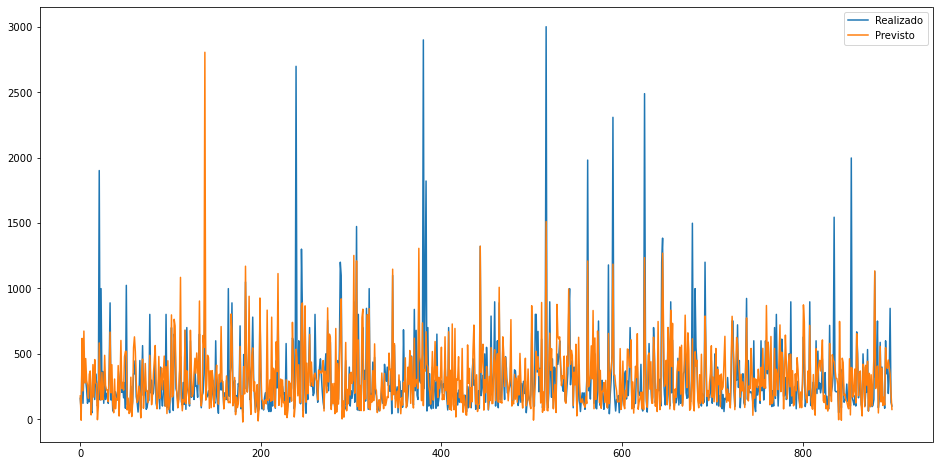

In [96]:
results[:].plot(kind='line', figsize=(16,8))

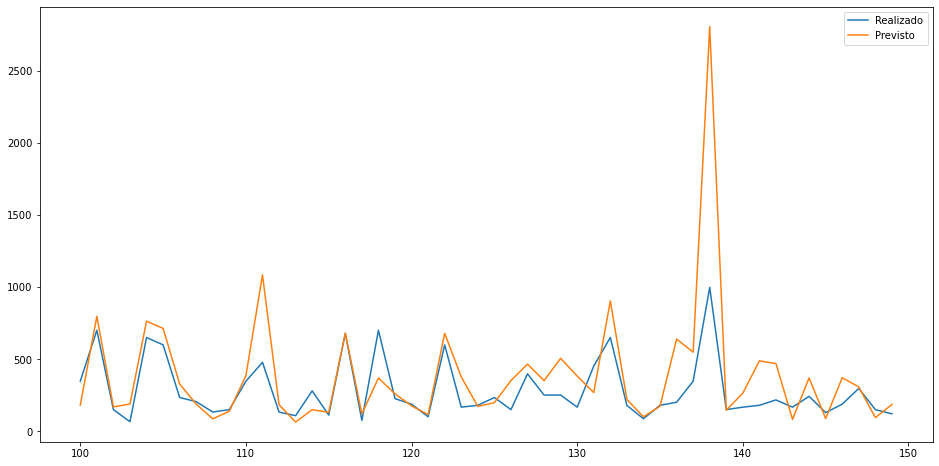

In [97]:
results[100:150].plot(kind='line', figsize=(16,8))